I referred the article here : https://towardsdatascience.com/how-to-create-an-interactive-dropdown-in-jupyter-322277f58a68

In [ ]:
#Importing the essentials
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [37]:
#read the covid19 csv with the index as country
covid_df = pd.read_csv('covid19.csv', index_col='Country/Region')

In [38]:
covid_df.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,8/19/22,8/20/22,8/21/22,8/22/22,8/23/22,8/24/22,8/25/22,8/26/22,8/27/22,8/28/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,190254,190435,190643,191040,191247,191585,191967,191967,191967,192463
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,325241,325736,326077,326181,326787,327232,327607,327961,328299,328515
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,269650,269731,269805,269894,269971,270043,270097,270145,270175,270194
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,45975,45975,45975,45975,45975,46027,46027,46027,46027,46027
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,102636,102636,102636,102636,102636,102636,102636,102636,102636,102636


### Data Cleaning

In [39]:
covid_df_latest = covid_df.T.index.values[-1]

In [36]:
#group cases by country/region
covid_df_group = covid_df.groupby('Country/Region').sum()

#sort the values by the covid_df_latest index and also pick top 10 using the head function and drop Lat and Long along axis = 1
covid_df = covid_df_group.sort_values(by=covid_df_latest,ascending=False).head(10).drop(['Lat', 'Long'],axis=1).T

KeyError: 'Country/Region'

In [33]:
covid_df.T.index.values

array(['US', 'India', 'France', 'Brazil', 'Germany', 'United Kingdom',
       'Korea, South', 'Italy', 'Russia', 'Japan'], dtype=object)

In [35]:
covid_df_latest

'8/28/22'

In [21]:
#multi-plot 
def multi_plot(df, title, addAll = True):
    fig = go.Figure()

    for column in df.columns.to_list():
        fig.add_trace(
            #scatter plot and axes x and y
            go.Scatter(
                x = df.index,
                y = df[column],
                name = column
            )
        )
    #define the buttons
    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])

    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ],
         yaxis_type="log"       
    )
    # Update remaining layout properties
    fig.update_layout(
        title_text=title,
        height=800
        
    )
   
    fig.show()

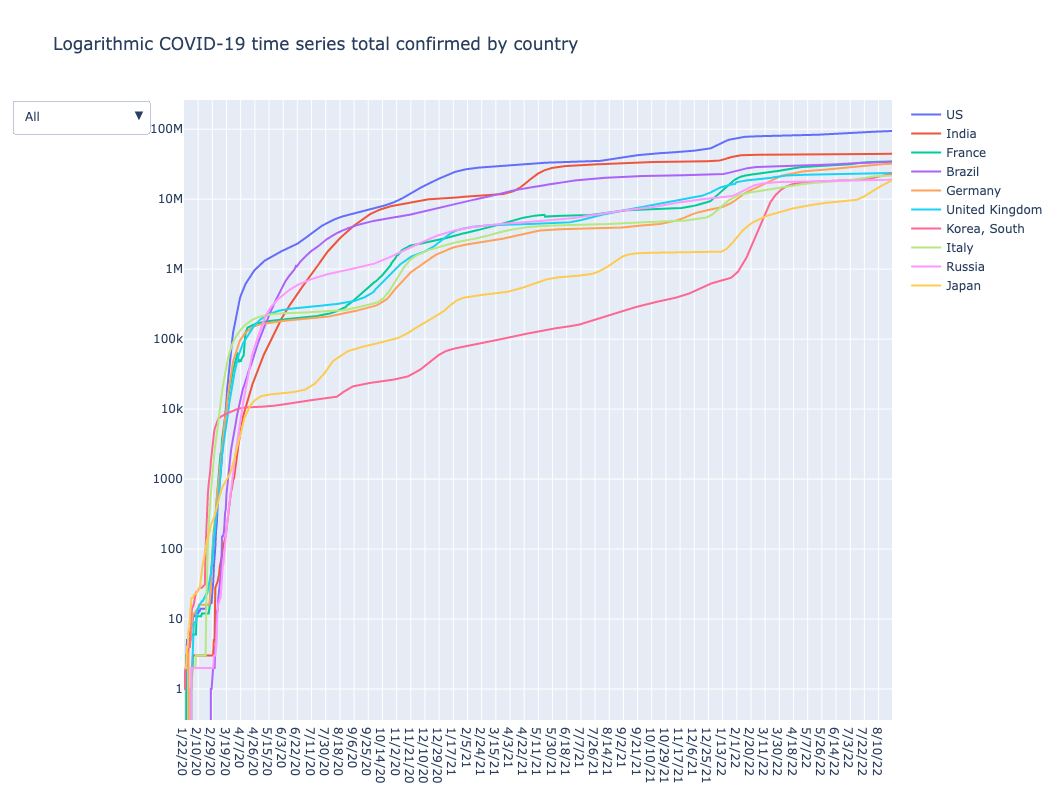

In [22]:
multi_plot(df_confirmed, title="Logarithmic COVID-19 time series total confirmed by country")    